In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('weatherHistory.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
print(df['Summary'].value_counts())

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [ ]:
df = df[(df['Summary'] == 'Overcast') | (df['Summary'] == 'Clear') | (df['Summary'] == 'Foggy')]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34635 entries, 46 to 96436
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            34635 non-null  object 
 1   Summary                   34635 non-null  object 
 2   Precip Type               34396 non-null  object 
 3   Temperature (C)           34635 non-null  float64
 4   Apparent Temperature (C)  34635 non-null  float64
 5   Humidity                  34635 non-null  float64
 6   Wind Speed (km/h)         34635 non-null  float64
 7   Wind Bearing (degrees)    34635 non-null  float64
 8   Visibility (km)           34635 non-null  float64
 9   Loud Cover                34635 non-null  float64
 10  Pressure (millibars)      34635 non-null  float64
 11  Daily Summary             34635 non-null  object 
dtypes: float64(8), object(4)
memory usage: 3.4+ MB


In [ ]:
print(df['Summary'].value_counts())

Overcast    16597
Clear       10890
Foggy        7148
Name: Summary, dtype: int64


In [ ]:
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 239
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
df.drop(['Daily Summary', 'Loud Cover'], axis=1, inplace=True)

In [ ]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
46,2006-04-10 22:00:00.000 +0200,Overcast,rain,14.422222,14.422222,0.58,20.0123,159.0,15.8263,1007.85
47,2006-04-10 23:00:00.000 +0200,Overcast,rain,14.255556,14.255556,0.59,16.5025,168.0,14.9569,1007.89
48,2006-04-11 00:00:00.000 +0200,Overcast,rain,13.772222,13.772222,0.60,17.0982,160.0,15.8263,1007.36
49,2006-04-11 01:00:00.000 +0200,Overcast,rain,13.283333,13.283333,0.63,14.3612,160.0,15.8263,1007.26
50,2006-04-11 02:00:00.000 +0200,Overcast,rain,8.633333,5.466667,0.87,22.0409,32.0,6.6976,1005.10


In [ ]:
df['Precip Type'].value_counts()

rain    27422
snow     6974
Name: Precip Type, dtype: int64

In [ ]:
#df[df.isnull().any(axis=1)] is to check the rows and columns in the the dataset that are Empty
df.dropna(inplace=True)
df.shape

(34396, 10)

In [ ]:
print('Duplicated values:', df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicated values: 17


In [ ]:
#Rounding to the
float_cols = df.select_dtypes(include='float')
df[float_cols.columns] = float_cols.round(2)
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
46,2006-04-10 22:00:00.000 +0200,Overcast,rain,14.42,14.42,0.58,20.01,159.0,15.83,1007.85
47,2006-04-10 23:00:00.000 +0200,Overcast,rain,14.26,14.26,0.59,16.50,168.0,14.96,1007.89
48,2006-04-11 00:00:00.000 +0200,Overcast,rain,13.77,13.77,0.60,17.10,160.0,15.83,1007.36
49,2006-04-11 01:00:00.000 +0200,Overcast,rain,13.28,13.28,0.63,14.36,160.0,15.83,1007.26
50,2006-04-11 02:00:00.000 +0200,Overcast,rain,8.63,5.47,0.87,22.04,32.0,6.70,1005.10
...,...,...,...,...,...,...,...,...,...,...
96432,2016-09-09 03:00:00.000 +0200,Clear,rain,15.59,15.59,0.87,3.28,41.0,15.44,1014.52
96433,2016-09-09 04:00:00.000 +0200,Clear,rain,15.01,15.01,0.93,3.20,341.0,15.83,1014.37
96434,2016-09-09 05:00:00.000 +0200,Clear,rain,15.02,15.02,0.90,2.70,359.0,14.96,1014.55
96435,2016-09-09 06:00:00.000 +0200,Clear,rain,13.87,13.87,0.93,4.75,0.0,15.83,1014.66


In [ ]:
cols = ['Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
cols

['Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Pressure (millibars)']

In [ ]:
outlier_df = df.copy()

In [ ]:
Q1 = outlier_df.quantile(0.25)
Q3 = outlier_df.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
((outlier_df < (Q1 - 1.5 * IQR)) | (outlier_df > (Q3 + 1.5 * IQR))).sum()

Apparent Temperature (C)      54
Formatted Date                 0
Humidity                    2091
Precip Type                    0
Pressure (millibars)        1291
Summary                        0
Temperature (C)              270
Visibility (km)                0
Wind Bearing (degrees)         0
Wind Speed (km/h)            406
dtype: int64

In [ ]:
def iqr_cap(df, cols):
    for i in cols:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        upper_b = q3 + 1.5*iqr
        lower_l = q1 - 1.5*iqr

        df[i] = np.where(df[i] > upper_b, upper_b, np.where(df[i] < lower_l, lower_l, df[i]))
    return df

In [ ]:
iqr_cap(outlier_df, cols)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
46,2006-04-10 22:00:00.000 +0200,Overcast,rain,14.42,14.42,0.58,20.01,159.0,15.83,1007.85
47,2006-04-10 23:00:00.000 +0200,Overcast,rain,14.26,14.26,0.59,16.50,168.0,14.96,1007.89
48,2006-04-11 00:00:00.000 +0200,Overcast,rain,13.77,13.77,0.60,17.10,160.0,15.83,1007.36
49,2006-04-11 01:00:00.000 +0200,Overcast,rain,13.28,13.28,0.63,14.36,160.0,15.83,1007.26
50,2006-04-11 02:00:00.000 +0200,Overcast,rain,8.63,5.47,0.87,22.04,32.0,6.70,1005.10
...,...,...,...,...,...,...,...,...,...,...
96432,2016-09-09 03:00:00.000 +0200,Clear,rain,15.59,15.59,0.87,3.28,41.0,15.44,1014.52
96433,2016-09-09 04:00:00.000 +0200,Clear,rain,15.01,15.01,0.93,3.20,341.0,15.83,1014.37
96434,2016-09-09 05:00:00.000 +0200,Clear,rain,15.02,15.02,0.90,2.70,359.0,14.96,1014.55
96435,2016-09-09 06:00:00.000 +0200,Clear,rain,13.87,13.87,0.93,4.75,0.0,15.83,1014.66


In [ ]:
outlier_df['Summary'].unique()

array(['Overcast', 'Foggy', 'Clear'], dtype=object)

In [ ]:
outlier_df1 = outlier_df.copy()

In [ ]:
import numpy as np
from datetime import datetime

def discretize_date(current_date, t):
    current_date = current_date[:-10]
    cdate = datetime.strptime(current_date, '%Y-%m-%d %H:%M:%S')

    if t == 'hour_sin':
        return np.sin(2 * np.pi * cdate.hour/24.0)
    if t == 'hour_cos':
        return np.cos(2 * np.pi * cdate.hour/24.0)
    if t == 'day_sin':
        return np.sin(2 * np.pi * cdate.timetuple().tm_yday/365.0)
    if t == 'day_cos':
        return np.cos(2 * np.pi * cdate.timetuple().tm_yday/365.0)

In [ ]:
date_types = ['hour_sin', 'hour_cos', 'day_sin', 'day_cos']
for dt in date_types:
   outlier_df1[dt] =outlier_df1['Formatted Date'].apply(lambda x : discretize_date(x, dt))
outlier_df1.drop(['Formatted Date'],axis=1,inplace=True)

In [ ]:
outlier_df = outlier_df.drop(['Formatted Date'], axis=1)

In [ ]:
outlier_df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
46,Overcast,rain,14.42,14.42,0.58,20.01,159.0,15.83,1007.85
47,Overcast,rain,14.26,14.26,0.59,16.50,168.0,14.96,1007.89
48,Overcast,rain,13.77,13.77,0.60,17.10,160.0,15.83,1007.36
49,Overcast,rain,13.28,13.28,0.63,14.36,160.0,15.83,1007.26
50,Overcast,rain,8.63,5.47,0.87,22.04,32.0,6.70,1005.10
...,...,...,...,...,...,...,...,...,...
96432,Clear,rain,15.59,15.59,0.87,3.28,41.0,15.44,1014.52
96433,Clear,rain,15.01,15.01,0.93,3.20,341.0,15.83,1014.37
96434,Clear,rain,15.02,15.02,0.90,2.70,359.0,14.96,1014.55
96435,Clear,rain,13.87,13.87,0.93,4.75,0.0,15.83,1014.66


In [ ]:
cat_cols = outlier_df.select_dtypes(include=["object"]).columns
cat_cols

Index(['Summary', 'Precip Type'], dtype='object')

In [ ]:
# encode the Categorical Variable
from sklearn.preprocessing import LabelEncoder
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [ ]:
outlier_df = MultiColumnLabelEncoder(columns= cat_cols).fit_transform(outlier_df)

In [ ]:
outlier_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34379 entries, 46 to 96436
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   34379 non-null  int32  
 1   Precip Type               34379 non-null  int32  
 2   Temperature (C)           34379 non-null  float64
 3   Apparent Temperature (C)  34379 non-null  float64
 4   Humidity                  34379 non-null  float64
 5   Wind Speed (km/h)         34379 non-null  float64
 6   Wind Bearing (degrees)    34379 non-null  float64
 7   Visibility (km)           34379 non-null  float64
 8   Pressure (millibars)      34379 non-null  float64
dtypes: float64(7), int32(2)
memory usage: 2.4 MB


In [ ]:
y = outlier_df.iloc[:,0]
x = outlier_df.iloc[:,1:8]

In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest
fs = SelectKBest(score_func=f_classif, k=5)

In [ ]:
fs.fit(x, y)

SelectKBest(k=5)

In [ ]:
fs.get_support().sum()

5

In [ ]:
import math

In [ ]:
def list_cell(x):
    return[math.ceil(i) for i in x]

In [ ]:
print("P_values:")
print(np.round(fs.pvalues_, 4))
print("F Values :")
print(fs.scores_)

P_values:
[0. 0. 0. 0. 0. 0. 0.]
F Values :
[ 1420.38847189  3774.2700312   3383.81033168  6221.54643972
  2338.02376797    45.14261993 19207.9013844 ]


In [ ]:
list_cell(fs.scores_)

[1421, 3775, 3384, 6222, 2339, 46, 19208]

In [ ]:
features_score = pd.DataFrame(fs.scores_)
features_pvalue = pd.DataFrame(np.round(fs.pvalues_,4))
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)
# Assign the column name
feature_score.columns = ["Input_Features","Score","P_Value"]
print(feature_score.nlargest(5,columns="Score"))

             Input_Features         Score  P_Value
6           Visibility (km)  19207.901384      0.0
3                  Humidity   6221.546440      0.0
1           Temperature (C)   3774.270031      0.0
2  Apparent Temperature (C)   3383.810332      0.0
4         Wind Speed (km/h)   2338.023768      0.0


In [ ]:
outlier_df1


,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),hour_sin,hour_cos,day_sin,day_cos
46,Overcast,rain,14.42,14.42,0.58,20.01,159.0,15.83,1007.85,-0.500000,8.660254e-01,0.988678,-0.150055
47,Overcast,rain,14.26,14.26,0.59,16.50,168.0,14.96,1007.89,-0.258819,9.659258e-01,0.988678,-0.150055
48,Overcast,rain,13.77,13.77,0.60,17.10,160.0,15.83,1007.36,0.000000,1.000000e+00,0.985948,-0.167052
49,Overcast,rain,13.28,13.28,0.63,14.36,160.0,15.83,1007.26,0.258819,9.659258e-01,0.985948,-0.167052
50,Overcast,rain,8.63,5.47,0.87,22.04,32.0,6.70,1005.10,0.500000,8.660254e-01,0.985948,-0.167052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96432,Clear,rain,15.59,15.59,0.87,3.28,41.0,15.44,1014.52,0.707107,7.071068e-01,-0.936881,-0.349647
96433,Clear,rain,15.01,15.01,0.93,3.20,341.0,15.83,1014.37,0.866025,5.000000e-01,-0.936881,-0.349647
96434,Clear,rain,15.02,15.02,0.90,2.70,359.0,14.96,1014.55,0.965926,2.588190e-01,-0.936881,-0.349647
96435,Clear,rain,13.87,13.87,0.93,4.75,0.0,15.83,1014.66,1.000000,6.123234e-17,-0.936881,-0.349647


In [ ]:
outlier_df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
46,2,0,14.42,14.42,0.58,20.01,159.0,15.83,1007.85
47,2,0,14.26,14.26,0.59,16.50,168.0,14.96,1007.89
48,2,0,13.77,13.77,0.60,17.10,160.0,15.83,1007.36
49,2,0,13.28,13.28,0.63,14.36,160.0,15.83,1007.26
50,2,0,8.63,5.47,0.87,22.04,32.0,6.70,1005.10
...,...,...,...,...,...,...,...,...,...
96432,0,0,15.59,15.59,0.87,3.28,41.0,15.44,1014.52
96433,0,0,15.01,15.01,0.93,3.20,341.0,15.83,1014.37
96434,0,0,15.02,15.02,0.90,2.70,359.0,14.96,1014.55
96435,0,0,13.87,13.87,0.93,4.75,0.0,15.83,1014.66


In [ ]:
le = LabelEncoder()
outlier_df1['Precip Type']=le.fit_transform(outlier_df1['Precip Type'])
outlier_df1['Summary']=le.fit_transform(outlier_df1['Summary'])
outlier_df1.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),hour_sin,hour_cos,day_sin,day_cos
46,2,0,14.42,14.42,0.58,20.01,159.0,15.83,1007.85,-0.500000,0.866025,0.988678,-0.150055
47,2,0,14.26,14.26,0.59,16.50,168.0,14.96,1007.89,-0.258819,0.965926,0.988678,-0.150055
48,2,0,13.77,13.77,0.60,17.10,160.0,15.83,1007.36,0.000000,1.000000,0.985948,-0.167052
49,2,0,13.28,13.28,0.63,14.36,160.0,15.83,1007.26,0.258819,0.965926,0.985948,-0.167052
50,2,0,8.63,5.47,0.87,22.04,32.0,6.70,1005.10,0.500000,0.866025,0.985948,-0.167052


In [ ]:
outlier_df1.dtypes

Summary                       int32
Precip Type                   int32
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Pressure (millibars)        float64
hour_sin                    float64
hour_cos                    float64
day_sin                     float64
day_cos                     float64
dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
outlier_df1[outlier_df1.columns[2:]] = scaler.fit_transform(outlier_df1[outlier_df1.columns[2:]])
outlier_df1.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),hour_sin,hour_cos,day_sin,day_cos
46,2,0,0.780288,0.832759,-1.821135,1.642965,-0.182770,1.491458,-0.958846,-0.883992,1.032114,1.419431,-0.602607
47,2,0,0.761907,0.816574,-1.749520,1.078739,-0.100709,1.317224,-0.954746,-0.535696,1.175328,1.419431,-0.602607
48,2,0,0.705613,0.767008,-1.677904,1.175188,-0.173652,1.491458,-1.009079,-0.161929,1.224176,1.415497,-0.627852
49,2,0,0.649320,0.717441,-1.463057,0.734738,-0.173652,1.491458,-1.019331,0.211838,1.175328,1.415497,-0.627852
50,2,0,0.115105,-0.072588,0.255717,1.969283,-1.340736,-0.337001,-1.240765,0.560134,1.032114,1.415497,-0.627852


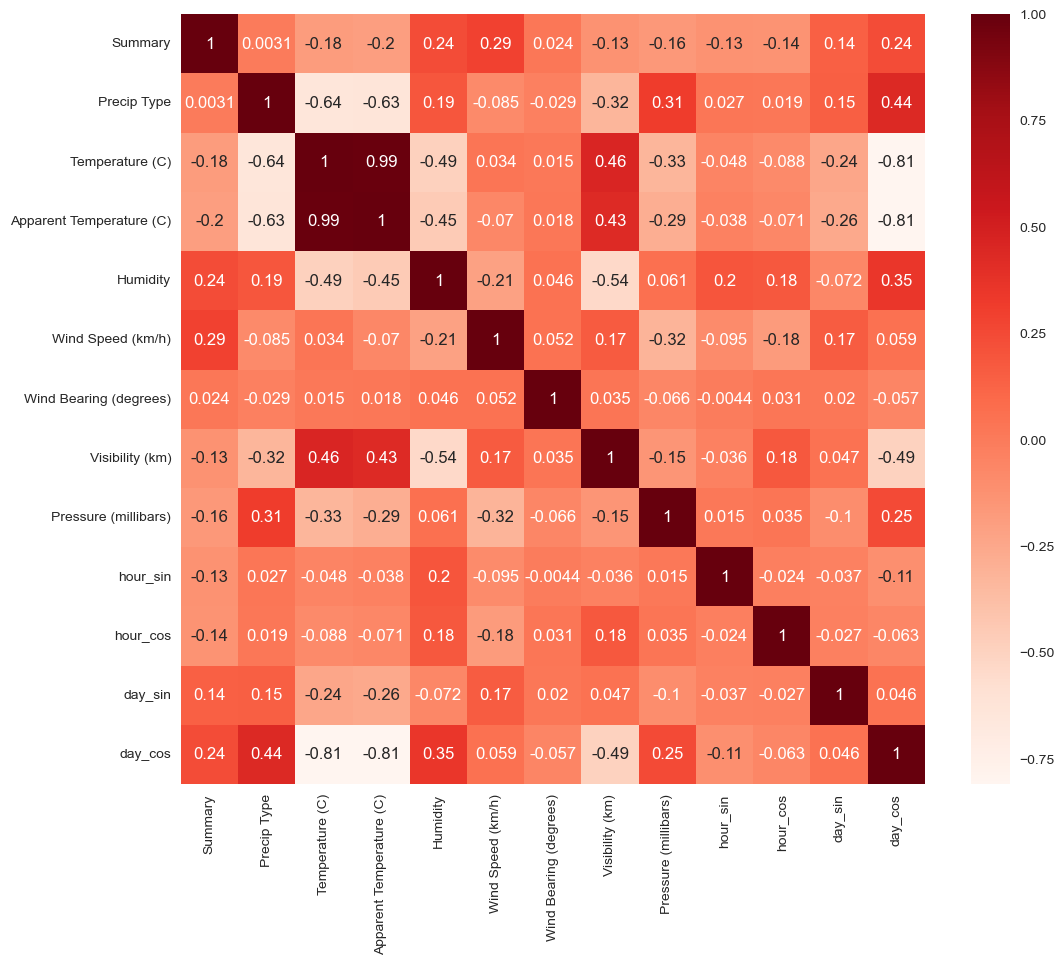

In [ ]:
plt.figure(figsize=(12,10))
cor = outlier_df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
final_df = outlier_df1.drop(['Apparent Temperature (C)', 'Precip Type', 'Wind Bearing (degrees)', 'Pressure (millibars)', 'Wind Speed (km/h)', 'Pressure (millibars)'], axis=1)

In [ ]:
final_df

,Summary,Temperature (C),Humidity,Visibility (km),hour_sin,hour_cos,day_sin,day_cos
46,2,0.780288,-1.821135,1.491458,-0.883992,1.032114,1.419431,-0.602607
47,2,0.761907,-1.749520,1.317224,-0.535696,1.175328,1.419431,-0.602607
48,2,0.705613,-1.677904,1.491458,-0.161929,1.224176,1.415497,-0.627852
49,2,0.649320,-1.463057,1.491458,0.211838,1.175328,1.415497,-0.627852
50,2,0.115105,0.255717,-0.337001,0.560134,1.032114,1.415497,-0.627852
...,...,...,...,...,...,...,...,...
96432,0,0.914703,0.255717,1.413353,0.859222,0.804294,-1.355879,-0.899072
96433,0,0.848070,0.685410,1.491458,1.088720,0.507392,-1.355879,-0.899072
96434,0,0.849219,0.470563,1.317224,1.232989,0.161643,-1.355879,-0.899072
96435,0,0.717102,0.685410,1.491458,1.282196,-0.209391,-1.355879,-0.899072


In [ ]:
y = final_df.iloc[:,0]
x = final_df.iloc[:,1:8]

In [ ]:
x

,Temperature (C),Humidity,Visibility (km),hour_sin,hour_cos,day_sin,day_cos
46,0.780288,-1.821135,1.491458,-0.883992,1.032114,1.419431,-0.602607
47,0.761907,-1.749520,1.317224,-0.535696,1.175328,1.419431,-0.602607
48,0.705613,-1.677904,1.491458,-0.161929,1.224176,1.415497,-0.627852
49,0.649320,-1.463057,1.491458,0.211838,1.175328,1.415497,-0.627852
50,0.115105,0.255717,-0.337001,0.560134,1.032114,1.415497,-0.627852
...,...,...,...,...,...,...,...
96432,0.914703,0.255717,1.413353,0.859222,0.804294,-1.355879,-0.899072
96433,0.848070,0.685410,1.491458,1.088720,0.507392,-1.355879,-0.899072
96434,0.849219,0.470563,1.317224,1.232989,0.161643,-1.355879,-0.899072
96435,0.717102,0.685410,1.491458,1.282196,-0.209391,-1.355879,-0.899072


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=2, solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, criterion='entropy'),
    'Random Forest': RandomForestClassifier(n_estimators=120, max_depth=5, random_state=2),
    'svc': SVC(kernel='linear', C=1.0)
}

In [ ]:
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f'{model_name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print('---')

Logistic Regression Metrics:
Accuracy: 0.72
Precision: 0.72
Recall: 0.74
F1 Score: 0.72
---
Decision Tree Metrics:
Accuracy: 0.80
Precision: 0.83
Recall: 0.82
F1 Score: 0.82
---


Random Forest Metrics:
Accuracy: 0.80
Precision: 0.84
Recall: 0.81
F1 Score: 0.81
---
svc Metrics:
Accuracy: 0.80
Precision: 0.81
Recall: 0.81
F1 Score: 0.81
---


In [ ]:
import xgboost as xgb

In [ ]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test )

In [ ]:
params = {
    'objective': 'multi:softmax',  # For multi-class classification
    'num_class': len(np.unique(y)),  # Number of classes
    'eval_metric': 'mlogloss',  # Multi-class logarithmic loss
    'learning_rate': 0.15,
    'max_depth': 7,
    'min_child_weight': 1,
    #'num_boost_round': 50,
    #'objective': 'reg:squarederror',
    'subsample': 0.8
}

In [ ]:
model = xgb.train(params, dtrain, num_boost_round=50)

In [ ]:
y_pred1 = model.predict(dtest)

In [ ]:
accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.87


In [ ]:
num_rounds = 100  # Number of boosting rounds (you can experiment with different values)
model = xgb.train(params, dtrain, num_rounds)

In [ ]:
y_pred = model.predict(dtest)

In [ ]:
y_pred = y_pred.astype(int)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.88


In [ ]:
precision = precision_score(y_test, y_pred, average='macro')
print(f'precision: {precision:.2f}')

precision: 0.90


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dtrain1 = xgb.DMatrix(x_train, label=y_train)
dtest1 = xgb.DMatrix(x_test, label=y_test )

In [ ]:
param_grid = {
    'objective': ['reg:squarederror'],
    'learning_rate': [0.01, 0.1, 0.3],
    'num_boost_round': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.8, 1.0],
}
#'objective': 'multi:softmax',  # For multi-class classification
    #'num_class': len(np.unique(y)),  # Number of classes
    #'eval_metric': 'mlogloss',

In [ ]:
xgb_model = xgb.XGBRegressor()

In [ ]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[11:29:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



[11:29:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_boost_round" } are not used.

[11:29:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_boost_round" } are not used.

[11:29:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_boost_round" } are not used.

[11:29:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_boost_round" } are not used.

[11:29:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_boost

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 5, 10],
                         'num_boost_round': [50, 100, 200],
                         'objective': ['reg:squarederror'],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.3, 'max_depth': 7, 'min_child_weight': 1, 'num_boost_round': 50, 'objective': 'reg:squarederror', 'subsample': 1.0}


In [ ]:
best_model = xgb.XGBRegressor(learning_rate = 0.1, max_depth = 7, min_child_weight = 1, num_boost_round = 50, )

<Figure size 1600x600 with 0 Axes>

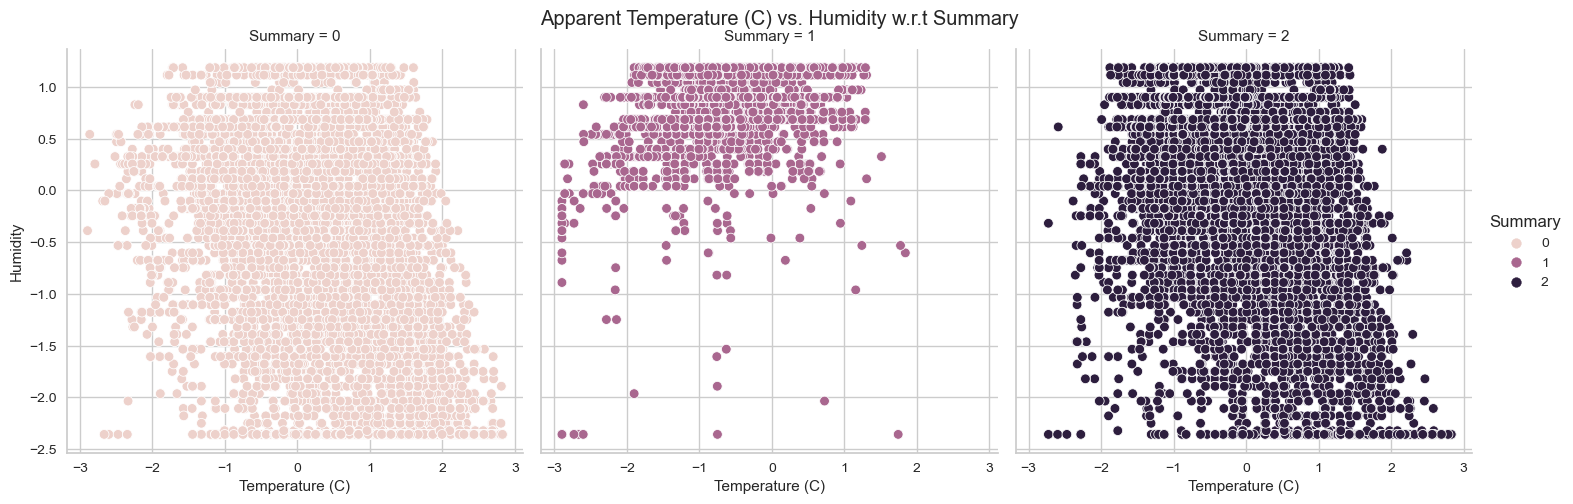

In [ ]:
plt.figure(figsize=(16,6))
g = sns.relplot(x='Temperature (C)',y='Humidity',color='purple',hue="Summary",data=final_df, col="Summary", col_wrap=3)
g.fig.suptitle("Apparent Temperature (C) vs. Humidity w.r.t Summary",y=1.005)
plt.show()

In [ ]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test )

In [ ]:
from xgboost import XGBClassifier

In [ ]:
lr = [0.15, 0.16, 0.17, 0.18, 0.20]

for i in range(50, 110, 10):
    print("**********************")
    print("n_estimator", i)
    print("**********************")
    for j in lr:
        xgb_1 = XGBClassifier(n_estimators = i, learning_rate=j, random_state = 14)
        xgb_1.fit(x_train, y_train)
        y_predict = xgb_1.predict(x_test)
        print("Accuracy of:",j,"-", accuracy_score(y_test, y_predict))
        print("Recall:", recall_score(y_test, y_predict, average = 'weighted'))
        print("Precision:", precision_score(y_test, y_predict, average = 'weighted'))
        print("F1 score:", f1_score(y_test, y_predict, average='weighted'))
        print("-------------------------------------------------------------")


**********************
n_estimator 50
**********************
Accuracy of: 0.15 - 0.8597743698219636
Recall: 0.8597743698219636
Precision: 0.8592535347533934
F1 score: 0.8578560424904601
-------------------------------------------------------------
Accuracy of: 0.16 - 0.859421822668782
Recall: 0.859421822668782
Precision: 0.8587897256160059
F1 score: 0.8576145436068368
-------------------------------------------------------------
Accuracy of: 0.17 - 0.8638286620835537
Recall: 0.8638286620835537
Precision: 0.863381713657496
F1 score: 0.8620271760268216
-------------------------------------------------------------
Accuracy of: 0.18 - 0.8625947470474176
Recall: 0.8625947470474176
Precision: 0.8620797383019657
F1 score: 0.860807750060713
-------------------------------------------------------------
Accuracy of: 0.2 - 0.864710029966508
Recall: 0.864710029966508
Precision: 0.8643433095898068
F1 score: 0.8628693263678715
-------------------------------------------------------------
***********

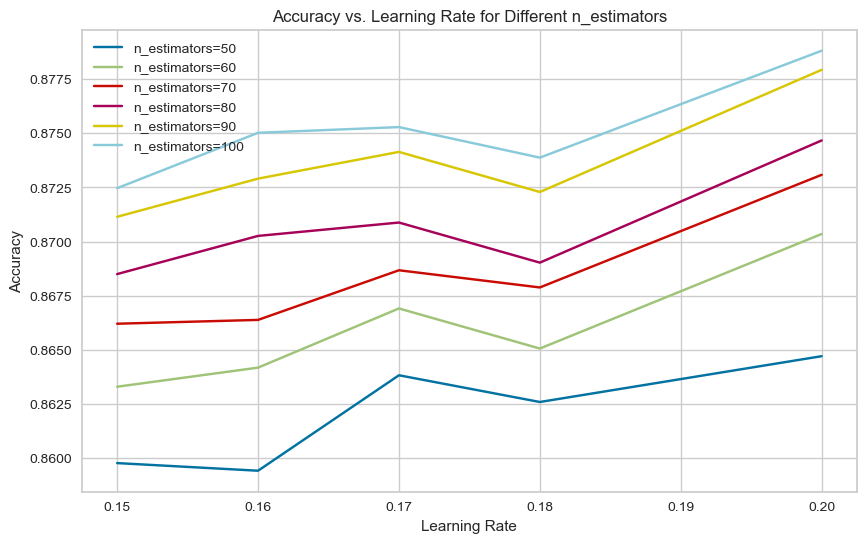

In [ ]:
lr = [0.15, 0.16, 0.17, 0.18, 0.20]
n_estimators_values = range(50, 110, 10)

accuracy_results = []  # To store accuracy values for each combination

for i in n_estimators_values:
    accuracy_lr = []  # To store accuracy values for a particular n_estimators value
    for j in lr:
        xgb_1 = XGBClassifier(n_estimators=i, learning_rate=j, random_state=14)
        xgb_1.fit(x_train, y_train)
        y_predict = xgb_1.predict(x_test)
        accuracy = accuracy_score(y_test, y_predict)
        accuracy_lr.append(accuracy)
    accuracy_results.append(accuracy_lr)

# Plotting the graph
plt.figure(figsize=(10, 6))
for i, n_estimators in enumerate(n_estimators_values):
    plt.plot(lr, accuracy_results[i], label=f"n_estimators={n_estimators}")
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Learning Rate for Different n_estimators')
plt.legend()
plt.grid(True)
plt.show()
